#  Unit 2.4b Using Programs with Data, SQL
> Using Programs with Data is focused on SQL and database actions.  Part B focuses on learning SQL commands, connections, and curses using an Imperative programming style,
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 26

# Database Programming is Program with Data
> Each Tri 2 Final Project should be an example of a Program with Data. 

>  Prepare to use SQLite in common Imperative Technique
- Explore [SQLite Connect object](https://www.tutorialspoint.com/python_data_access/python_sqlite_establishing_connection.htm) to establish database connection
- Explore [SQLite Cursor Object](https://www.tutorialspoint.com/python_data_access/python_sqlite_cursor_object.htm) to fetch data from a table within a database


## Schema of Users table in Sqlite.db
> Uses PRAGMA statement to read schema.

Describe Schema, here is resource [Resource](https://www.sqlite.org/index.html)
- What is a database schema?
- What is the purpose of identity Column in SQL database?
- What is the purpose of a primary key in SQL database?
- What are the Data Types in SQL table?

In [10]:
import sqlite3

database = 'instance/sqlite.db' # this is location of database

def schema():
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Fetch results of Schema
    results = cursor.execute("PRAGMA table_info('users')").fetchall()

    # Print the results
    for row in results:
        print(row)

    # Close the database connection
    conn.close()
    
schema()


(0, 'id', 'INTEGER', 1, None, 1)
(1, '_name', 'VARCHAR(255)', 1, None, 0)
(2, '_uid', 'VARCHAR(255)', 1, None, 0)
(3, '_password', 'VARCHAR(255)', 1, None, 0)
(4, '_dob', 'DATE', 0, None, 0)


## Reading Users table in Sqlite.db
> Uses SQL SELECT statement to read data

- What is a connection object?  After you google it, what do you think it does?
- Same for cursor object?
- Look at conn object and cursor object in VSCode debugger.  What attributes are in the object?
- Is "results" an object?  How do you know?

In [11]:
import sqlite3

def read():
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Execute a SELECT statement to retrieve data from a table
    results = cursor.execute('SELECT * FROM users').fetchall()

    # Print the results
    if len(results) == 0:
        print("Table is empty")
    else:
        for row in results:
            print(row)

    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
read()


(1, 'Thomas Edison', 'toby', 'sha256$ixht0dzpQCHOO4tA$0208dbbff8d1abdf56ea84d7a9470c02ca398da6a7b7576fa703648e44e212cd', '1847-02-11')
(2, 'Nikola Tesla', 'niko', 'sha256$PEmLDu7nETHnX6bA$43b37d3200054e2204242cd8038d96e70d97116aa5667f27768151617527c129', '2023-03-16')
(3, 'Alexander Graham Bell', 'lex', 'sha256$P0eRTnHDIjWXcDFd$469f6528bf02815d3f319830a163b379ca41080cd3ca197f82d4a3f8ac77fa3f', '2023-03-16')
(4, 'Eli Whitney', 'whit', 'sha256$qvOgE8K6QwTGC6TJ$ef42a62c6160019d4e6b1c4299de8908a6bddfd19a24d2402ccda18e769dfec0', '2023-03-16')
(6, 'shivansh', 'shiv', 'sha256$SIJjd1t6Ep8wt6A9$8fcd67b4914b442854f74cd1c0bbbae5b7af80a7c962256b4a4124cda6f3e637', '2007-10-29')


## Create a new User in table in Sqlite.db
> Uses SQL INSERT to add row
-  Compore create() in both SQL lessons.  What is better or worse in the two implementations?
-  Explain purpose of SQL INSERT.   Is this the same as User __init__?

In [12]:
import sqlite3

def create():
    name = input("Enter your name:")
    uid = input("Enter your user id:")
    password = input("Enter your password")
    dob = input("Enter your date of birth 'YYYY-MM-DD'")
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to insert data into a table
        cursor.execute("INSERT INTO users (_name, _uid, _password, _dob) VALUES (?, ?, ?, ?)", (name, uid, password, dob))
        
        # Commit the changes to the database
        conn.commit()
        print(f"A new user record {uid} has been created")
                
    except sqlite3.Error as error:
        print("Error while executing the INSERT:", error)


    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#create()

## Updating a User in table in Sqlite.db
> Uses SQL UPDATE to modify password
- What does the hacked part do?
- Explain try/except, when would except occur?
- What code seems to be repeated in each of these examples to point, why is it repeated?

In [13]:
import sqlite3

def update():
    uid = input("Enter user id to update")
    password = input("Enter updated password")
    if len(password) < 2:
        message = "hacked"
        password = 'gothackednewpassword123'
    else:
        message = "successfully updated"

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to update data in a table
        cursor.execute("UPDATE users SET _password = ? WHERE _uid = ?", (password, uid))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            print(f"The row with user id {uid} the password has been {message}")
            conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the UPDATE:", error)
        
    
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#update()


## Delete a User in table in Sqlite.db
> Uses a delete function to remove a user based on a user input of the id.
- Is DELETE a dangerous operation?  Why?
- In the print statemements, what is the "f" and what does {uid} do?

In [14]:
import sqlite3

def delete():
    uid = input("Enter user id to delete")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    
    try:
        cursor.execute("DELETE FROM users WHERE _uid = ?", (uid,))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            # The uid was found in the table and the row was deleted
            print(f"The row with uid {uid} was successfully deleted")
        conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the DELETE:", error)
        
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#delete()

# Menu Interface to CRUD operations
> CRUD and Schema interactions from one location by running menu. Observe input at the top of VSCode, observe output underneath code cell.
- Why does the menu repeat?
- Could you refactor this menu?  Make it work with a List?

In [15]:
# Menu, to run other cells from one control point
def menu():
    operation = input("Enter: (C)reate (R)ead (U)pdate or (D)elete or (S)chema")
    if operation.lower() == 'c':
        create()
    elif operation.lower() == 'r':
        read()
    elif operation.lower() == 'u':
        update()
    elif operation.lower() == 'd':
        delete()
    elif operation.lower() == 's':
        schema()
    elif len(operation)==0: # Escape Key
        return
    else:
        print("Please enter c, r, u, or d") 
    menu() # recursion, repeat menu
        
try:
    menu() # start menu
except:
    print("Perform Jupyter 'Run All' prior to starting menu")


A new user record indra has been created


# Hacks
- Add this Blog to you own Blogging site.  In the Blog add notes and observations on each code cell.
- In this implementation, do you see procedural abstraction?
- In 2.4a or 2.4b lecture
    - Do you see data abstraction?  Complement this with Debugging example.
    - Use Imperative or OOP style to Create a new Table or do something that applies to your CPT project.
    

Reference... [sqlite documentation](https://www.sqlitetutorial.net/sqlite-python/creating-tables/)


In [18]:
### Creating a New Table with the Data of time in "TEXT", low socre and high score in Text
conn = sqlite3.connect(database)

cursor = conn.cursor()
cursor.execute('''CREATE TABLE realscore
                  (id INTEGER PRIMARY KEY,
                   time TEXT,
                   low_score TEXT,
                   high_score TEXT)''')
conn.commit()

In [31]:
### Using the New Table by adding all the CRUD Properties 
import sqlite3

conn = sqlite3.connect(database)

def create_score(conn, time, low_score, high_score):
    cursor = conn.cursor()
    cursor.execute('''INSERT INTO realscore (time, low_score, high_score)
                      VALUES (?, ?, ?)''', (time, low_score, high_score))
    conn.commit()
    print("New Score Created")

def score_read(conn):
    cursor = conn.cursor()
    cursor.execute('''SELECT * FROM realscore''')
    rows = cursor.fetchall()
    for row in rows:
        print(row)

def score_update(conn, id, time, low_score, high_score):
    cursor = conn.cursor()
    cursor.execute('''UPDATE realscore SET time = ?, low_score = ?, high_score = ?
                      WHERE id = ?''', (time, low_score, high_score, id))
    conn.commit()
    print("The Scores which were selected were updated successfully!")

def score_delete(conn, id):
    cursor = conn.cursor()
    cursor.execute('''DELETE FROM Scores WHERE id = ?''', (id,))
    conn.commit()
    print("Score deleted successfully!")

while True:
    print("Why did you come to the SNAKE GAME")
    print("1. Deliver a New Score")
    print("2. Show all the Existing Scores")
    print("3. Update The Scores to Current Data")
    print("4. Delete A score or a Set of Scores")
    print("5. Exit")

    choice = input("Enter your choice (1-5): ")

    if choice == '1':
        time = input("Enter the Score time: ")
        low_score = input("Enter the Score low_score: ")
        high_score = input("Enter the Score high_score: ")
        create_score(conn, time, low_score, high_score)

    elif choice == '2':
        score_read(conn)

    elif choice == '3':
        id = input("Enter the Score ID: ")
        time = input("Enter the new Score time: ")
        low_score = input("Enter the new Score low_score: ")
        high_score = input("Enter the new Score high_score: ")
        score_update(conn, id, time, low_score, high_score)

    elif choice == '4':
        id = input("Enter the Score ID: ")
        score_delete(conn, id)

    elif choice == '5':
        break

    else:
        print("There was no choice that you selected, remeber that the choices are between 1-5")

Why did you come to the SNAKE GAME
1. Deliver a New Score
2. Show all the Existing Scores
3. Update The Scores to Current Data
4. Delete A score or a Set of Scores
5. Exit
There was no choice that you selected, remeber that the choices are between 1-5
Why did you come to the SNAKE GAME
1. Deliver a New Score
2. Show all the Existing Scores
3. Update The Scores to Current Data
4. Delete A score or a Set of Scores
5. Exit
There was no choice that you selected, remeber that the choices are between 1-5
Why did you come to the SNAKE GAME
1. Deliver a New Score
2. Show all the Existing Scores
3. Update The Scores to Current Data
4. Delete A score or a Set of Scores
5. Exit


# Debugging

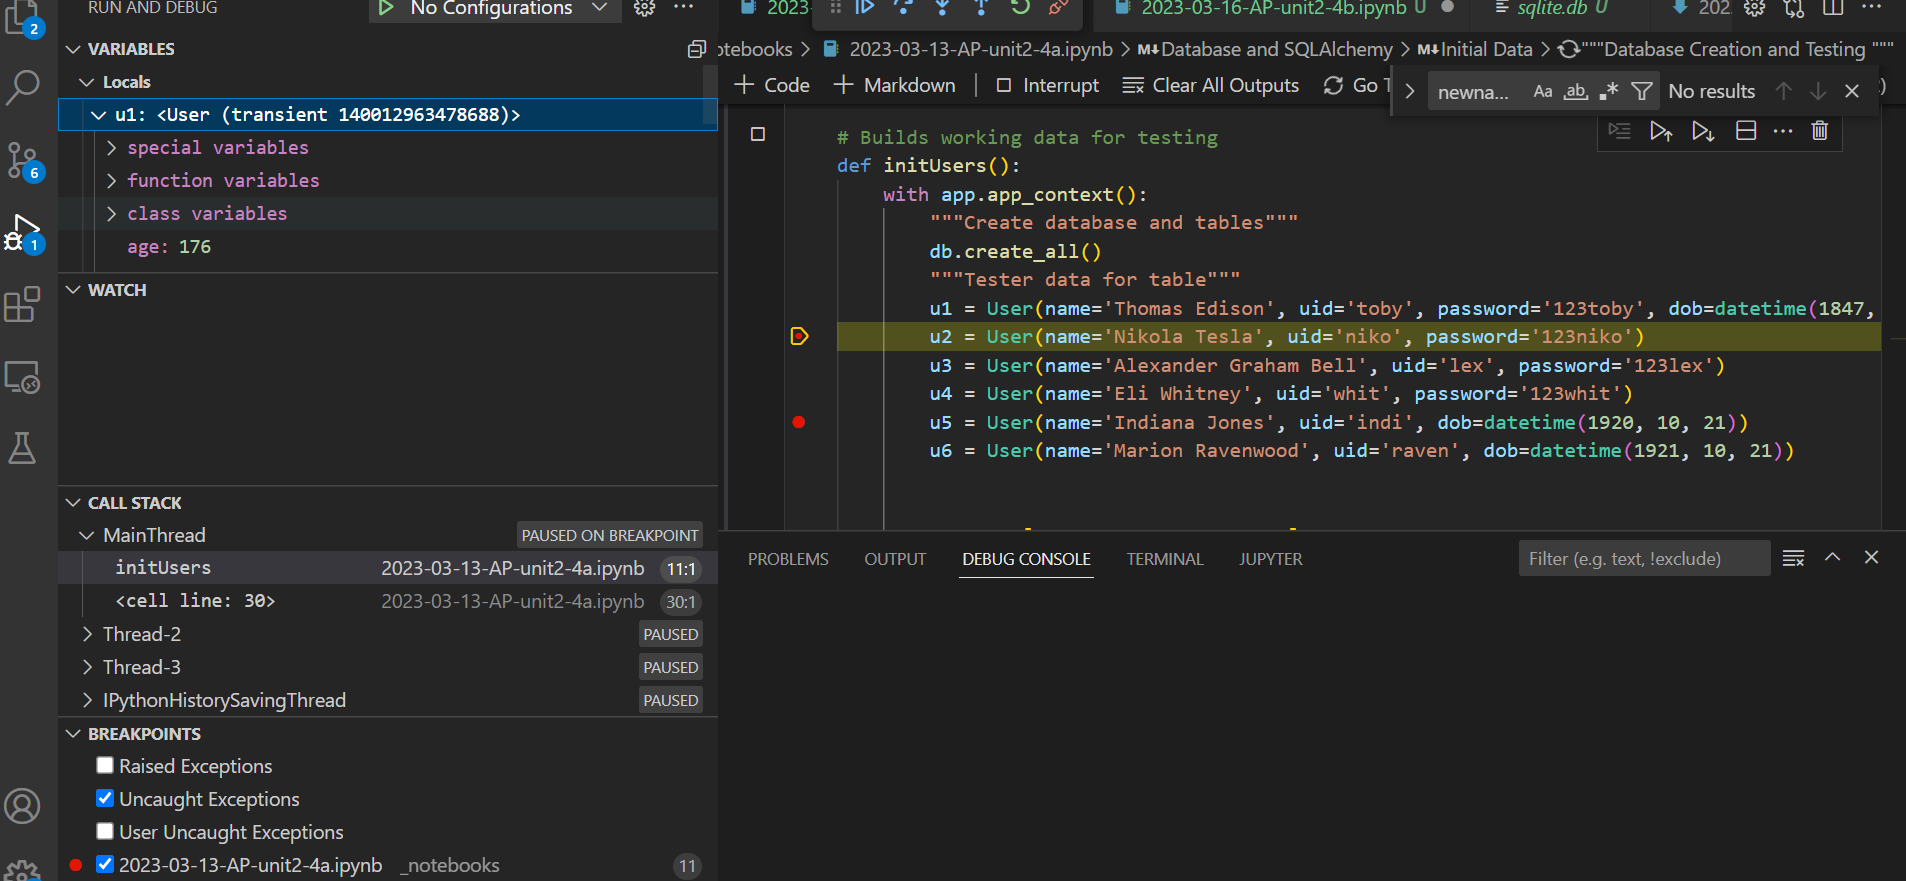

In [26]:
from PIL import Image

bug = Image.open('../images/debugging.PNG')
display(bug)

### Explanation for Data Abstraction
Data abstraction is the reduction of a particular body of data to a simplified representation of the whole. In this code I am using the different CRUD properites to make the data into a more simplified represnetation or changing the data to make for the user's interface. In my code the "create" part of the CRUD process is creating adding more data. The "read" part of the CRUD proccess is displaying/showing all the existing data. The "update" part of the CRUD process changes already existing data which is already situated. The "delete" part of the CRUD process removes a set of data from the existing/situated data.